<a href="https://colab.research.google.com/github/muratali016/AI-Photo-Editor-UNet/blob/main/Background_changer_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from unet import UNet
import torch
import torch.optim as optim
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
import numpy as np 
from google.colab.patches import cv2_imshow
import matplotlib.image as mpimg
model = UNet().to("cuda" if torch.cuda.is_available() else "cpu")
optimizer = optim.Adam(model.parameters(),lr=0.001) 
checkpoint = torch.load("/content/drive/MyDrive/UNet_portrait2.pth")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

torch.Size([1, 1, 572, 572])
Originial


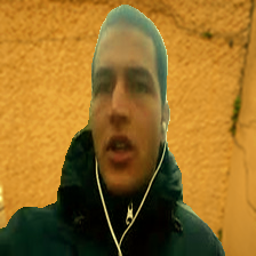

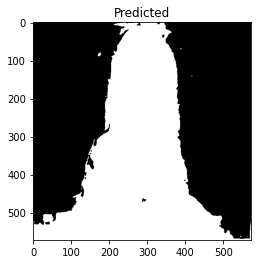

In [ ]:
org_img=cv2.imread("/content/warm_syn_sf165.png")
train_transform = A.Compose([
    A.Resize(572,572),
    ToTensorV2()  
])
org_img_arr=np.asarray(org_img)
org_img_tesnor=train_transform(image=org_img_arr)
org_img_tesnor["image"]=org_img_tesnor["image"].unsqueeze(0)
output = model(org_img_tesnor["image"].float().cuda()).to(device="cuda")
print(output.shape)
output = torch.squeeze(output)
output[output>0.0] = 1.0
output[output<=0.0]=0
disp = output.detach().cpu()
print("Originial")
plt.title("Predicted")
plt.imshow(disp,cmap="gray");cv2_imshow(org_img)
mpimg.imsave("mask.png", disp,cmap="gray")
mask_pred=cv2.imread("/content/mask.png")
mask_pred=cv2.resize(mask_pred,(224,224))
org_img=cv2.resize(org_img,(224,224))
org_img_copy=org_img.copy()
mask_copy=mask_pred.copy()

### App


AI photo editor 
Background color
green
blur ratio between 10-60
20
Path of background image
/content/new_york.png
Changing color...


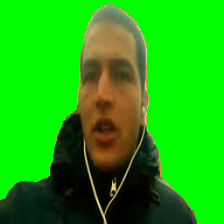

Applying blur...


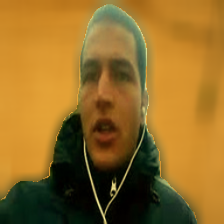

Changing background...


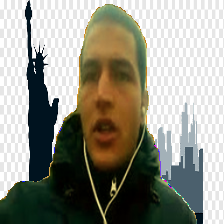

In [ ]:
import time
def change_color(color):

  if color=="blue":
    color=[255, 0, 0]
  elif color=="green":
    color=[0, 255, 0]
  elif color=="red":
    color=[0,0, 255]
  elif color=="white":
    color=[255,255, 255]
  elif color=="black":
    color=[0,0, 0]        
  th = 10
  black_pixels = np.where(
      (mask_copy[:, :, 0] < th) & 
      (mask_copy[:, :, 1] < th) & 
      (mask_copy[:, :, 2] <th)
  )
  print("Changing color...")
  time.sleep(1)
  org_img_copy[black_pixels] = color
  cv2_imshow(org_img_copy)
  
print("AI photo editor ")
print("Background color")
color=input()
print("blur ratio between 10-60")
blur_ratio=int(input())
print("Path of background image")
background_image_path=input()

def Blur(blur_ratio):
  if blur_ratio<10:
    print("Blur ratio can't be smaller than 10!")
    return -1
  elif blur_ratio>60:
    print("Blur ratio can't be greater than 50!") 
    return -1
  th=10
  print("Applying blur...")
  time.sleep(1)
  blur = cv2.blur(org_img,(blur_ratio,blur_ratio),0)
  out = org_img.copy()
  out[mask_copy<th] = blur[mask_copy<th]
  cv2_imshow(out)

def Change_background(background_image_path):
  background_image=cv2.imread(background_image_path)
  print("Changing background...")
  time.sleep(1)
  background_image=cv2.resize(background_image,(224,224))
  background_image[mask_copy == 255] = 0
  org_img_copy[mask_copy == 0]=0
  complete_image = org_img_copy + background_image
  cv2_imshow(complete_image)

change_color(color)
Blur(blur_ratio)
Change_background(background_image_path)